## Econometr´ıa II - Machine Learning -  Universidad Galileo
### Alumno:  Marcos Alexander Muchuch Simon -13218020
### Proyecto #1
Descripci´on: El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoy´andose
de referencias adicionales u´tiles) para crear modelos predictivos de regresi´on lineal uni-variable
sencillos de la forma: y = β0 + β1 ∗ x

In [1]:
# Importando la paqueteria necesaria 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Abrir el dataset, para esta oportunidad el dataset es un array que necesita una modificacion con los titulos. 
data = np.load("C:/Users/nidia/Documents/01-Marcos/Maestrias/10-Econometria2/Proyeto/01-DataFrame/proyecto_training_data.npy")

# Modificacion de los titulos
column_names = ["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
data_dict = {name: data[:, i] for i, name in enumerate(column_names)}

df = pd.DataFrame(data, columns=column_names)

# Imprimir las primeras filas del DataFrame para entender su estructura
print(df.head())

   SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0   208500.0          7.0     856.0           8.0     2003.0         65.0
1   181500.0          6.0    1262.0           6.0     1976.0         80.0
2   223500.0          7.0     920.0           6.0     2001.0         68.0
3   140000.0          7.0     961.0           7.0     1915.0         60.0
4   250000.0          8.0    1145.0           9.0     2000.0         84.0


In [2]:
# Imprimir la información general del DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB
None


### EDA análisis exploratorio de datos

In [3]:
# Imprimir estadísticas descriptivas
print(df.describe())

           SalePrice  OverallQual     1stFlrSF  TotRmsAbvGrd    YearBuilt  \
count    1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   180921.195890     6.099315  1162.626712      6.517808  1971.267808   
std     79442.502883     1.382997   386.587738      1.625393    30.202904   
min     34900.000000     1.000000   334.000000      2.000000  1872.000000   
25%    129975.000000     5.000000   882.000000      5.000000  1954.000000   
50%    163000.000000     6.000000  1087.000000      6.000000  1973.000000   
75%    214000.000000     7.000000  1391.250000      7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000     14.000000  2010.000000   

       LotFrontage  
count  1201.000000  
mean     70.049958  
std      24.284752  
min      21.000000  
25%      59.000000  
50%      69.000000  
75%      80.000000  
max     313.000000  


### IMPUTACION DE DATOS

In [4]:
# Buscar datos faltantes
print(df.isnull().sum())

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
dtype: int64


In [5]:
#CCA - Complete Case Analysis
df.dropna(axis=0, inplace=True)
df.isnull().mean()
# axis 1, borra columnas. 
# axis 0, borra filas. 
#para este proyecto se seleccion axis 0

SalePrice       0.0
OverallQual     0.0
1stFlrSF        0.0
TotRmsAbvGrd    0.0
YearBuilt       0.0
LotFrontage     0.0
dtype: float64

### DEFINIENDO LA VARIABLE X

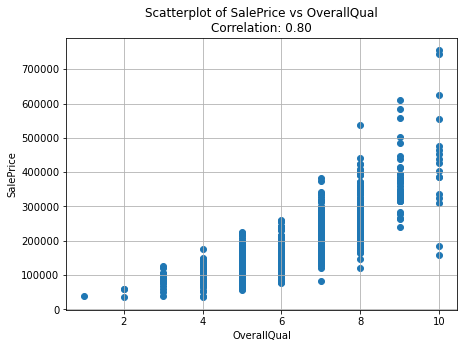

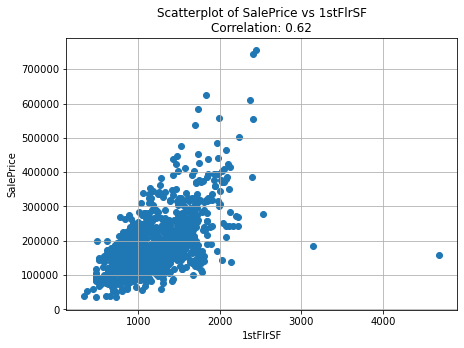

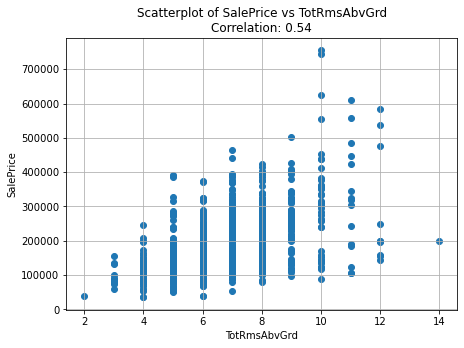

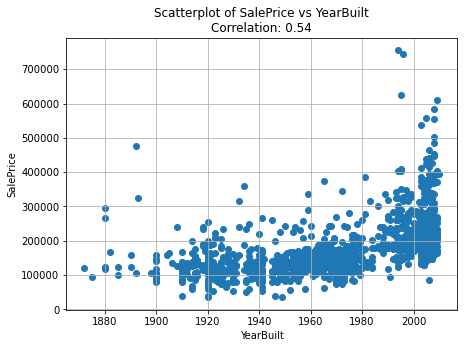

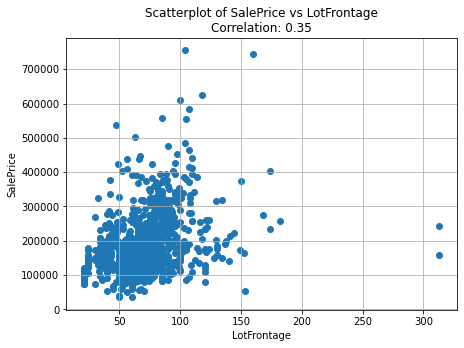

Las dos variables con mayor potencial predictivo son: OverallQual y 1stFlrSF


In [6]:
# Importando las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Lista de variables independientes
independent_vars = ['OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

correlations = {}

# Calculando el coeficiente de correlación y creando scatterplots
for var in independent_vars:
    correlations[var] = df['SalePrice'].corr(df[var])
    
    plt.figure(figsize=(7,5))
    plt.scatter(df[var], df['SalePrice'])
    plt.title(f'Scatterplot of SalePrice vs {var}\nCorrelation: {correlations[var]:.2f}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()

# Encontrando las dos variables con mayor correlación
sorted_vars = sorted(correlations, key=correlations.get, reverse=True)
top_2_vars = sorted_vars[:2]

print(f"Las dos variables con mayor potencial predictivo son: {top_2_vars[0]} y {top_2_vars[1]}")


In [7]:
# Correlación de todas las variables en relación con 'SalesPrice'
correlation = df.corr()
print(correlation['SalePrice'].sort_values(ascending=False))


SalePrice       1.000000
OverallQual     0.802287
1stFlrSF        0.620159
YearBuilt       0.538913
TotRmsAbvGrd    0.537215
LotFrontage     0.351799
Name: SalePrice, dtype: float64


In [8]:
# Encontrando la variable con la mayor correlación (excluyendo a sí misma)
correlation_without_self = correlation['SalePrice'][correlation.index != 'SalePrice']
max_correlated_variable = correlation_without_self.idxmax()
print("La variable con mayor correlación con 'SalesPrice' es:", max_correlated_variable)

La variable con mayor correlación con 'SalesPrice' es: OverallQual


<AxesSubplot:>

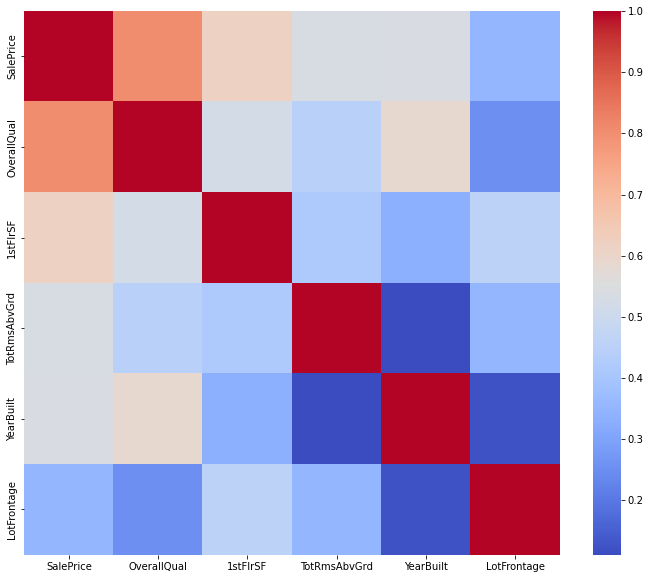

In [9]:
# Gráfica de correlación
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

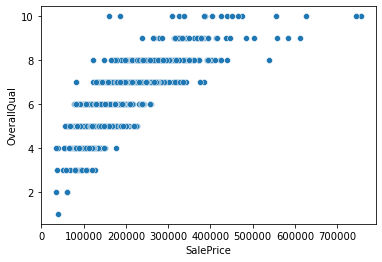

In [10]:
# Scatterplot para 'SalesPrice' y la variable con mayor correlación
sns.scatterplot(data=df, x='SalePrice', y=max_correlated_variable)

plt.show()

### PARTICION DEL DATASET DE ENTRENAMIENTO Y TEST

In [11]:
# Importando la biblioteca necesaria
from sklearn.model_selection import train_test_split

# Separando las variables predictoras (X) y la variable objetivo (y)
X = df['OverallQual']
y = df['SalePrice']

# Haciendo un split de 80-20 para el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora, "X_train" y "y_train" contienen el 80% de los datos que se usarán para el entrenamiento y el análisis exploratorio.
# "X_test" y "y_test" contienen el 20% de los datos que se usarán para la validación y las pruebas.


### FUNCIONES

In [12]:
# funcion de entranamiento de la regresion
import numpy as np

def train_linear_regression(x, y, epochs, imprimir_error_cada, learning_rate):
    n = len(x)
    X = np.c_[x, np.ones((n, 1))]  
    beta = np.zeros(2)  # Inicializar beta

    error_per_epoch = []
    model_per_epoch = {}

    for i in range(epochs):
        y_predicted = X.dot(beta)
        error = np.sum((y - y_predicted) ** 2) / (2*n)
        gradient = (1/n) * X.T.dot(y_predicted - y)
        beta = beta - learning_rate * gradient

        error_per_epoch.append(error)
        model_per_epoch[i] = beta

        if i % imprimir_error_cada == 0:
            print(f'Iteración: {i}, Error: {error}')

    return model_per_epoch, error_per_epoch


In [13]:
#funcion del error
import matplotlib.pyplot as plt

def plot_error(errors):
    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()


In [14]:
#Plot model para visualizar como cambia el model de la regresion lineal durante el etrenamiento.
def plot_model(X, y, models, n):
    for i, beta in models.items():
        if i % n == 0:
            plt.scatter(X, y, color='blue')
            y_predicted = X * beta[0] + beta[1]
            plt.plot(X, y_predicted, color='red')
            plt.show()


In [15]:
# Funcion para realizar las predicciones con el modelo entrenado. 
from sklearn.linear_model import LinearRegression

def predict(X, model_manual, model_sklearn):
    # Convertir el objeto de pandas a un arreglo de numpy y hacer el reshape
    X_reshaped = X.values.reshape(-1, 1)
    
    # Modelo Manual
    y_pred_manual = np.dot(np.c_[X_reshaped, np.ones(len(X_reshaped))], model_manual)

    # Modelo Scikit-learn
    y_pred_sklearn = model_sklearn.predict(X_reshaped)

    # Combinación de ambos modelos
    y_pred_combo = (y_pred_manual + y_pred_sklearn) / 2
    
    return y_pred_manual, y_pred_sklearn, y_pred_combo


### ENTRENAMIENTO Y REGRESION

In [16]:
#Definicion y entrenamiento del modelo de regresion lineal
models, errors = train_linear_regression(X_train, y_train, epochs=100, imprimir_error_cada=10, learning_rate=0.01)

Iteración: 0, Error: 19056003813.22448
Iteración: 10, Error: 1450942944.005652
Iteración: 20, Error: 1447757657.7526402
Iteración: 30, Error: 1445272993.2925584
Iteración: 40, Error: 1442812818.0692244
Iteración: 50, Error: 1440376865.2674794
Iteración: 60, Error: 1437964896.3969488
Iteración: 70, Error: 1435576675.3163748
Iteración: 80, Error: 1433211968.2095037
Iteración: 90, Error: 1430870543.5621908


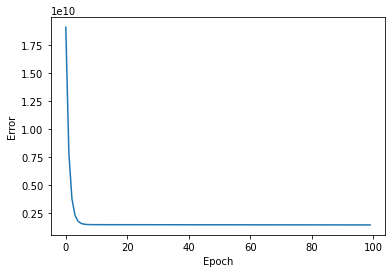

In [17]:
#Visualizacion de como cabmia el error durante el entrenamiento.
plot_error(errors)

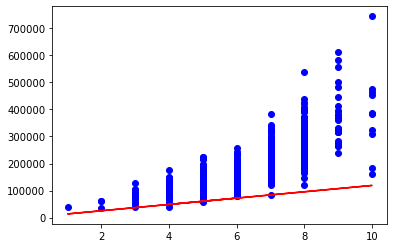

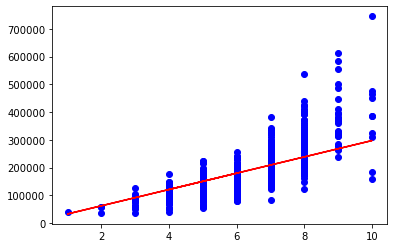

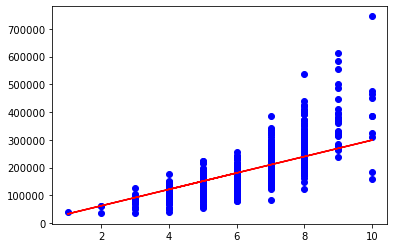

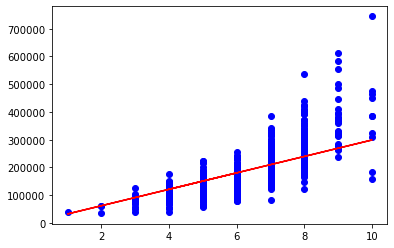

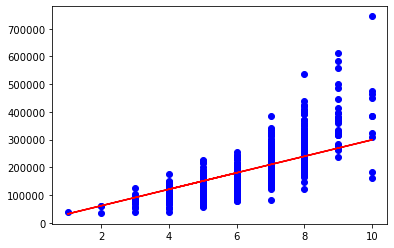

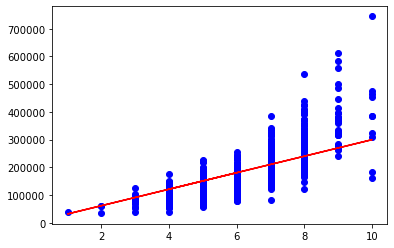

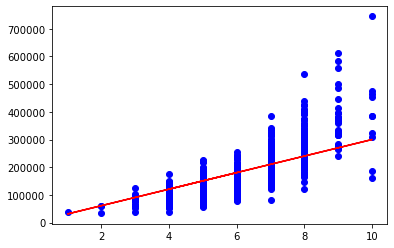

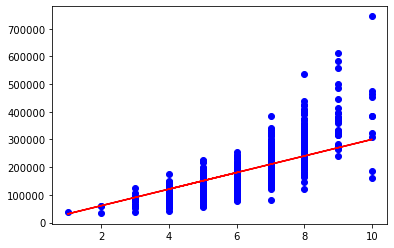

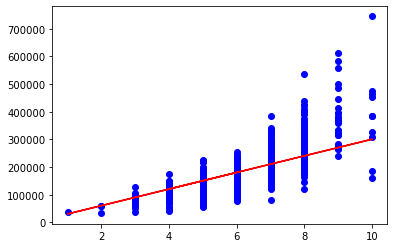

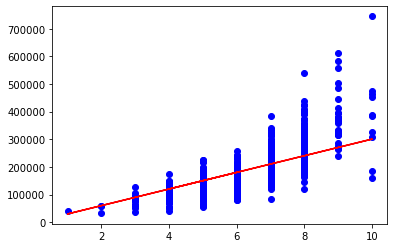

In [18]:
#Visualizacion de como cambia el modelo de la regresion lineal durante el entrenamiento
plot_model(X_train, y_train, models, n=10)

In [19]:
# Entrenar el modelo de scikit-learn con los mismos datos
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

# Utilizar el último modelo entrenado manualmente
model_manual = models[len(models) - 1]

# Predecir con los datos de prueba
y_pred_manual, y_pred_sklearn, y_pred_combo = predict(X_test, model_manual, reg)


print("Predicciones con el modelo manual: ", y_pred_manual)
print("Predicciones con el modelo scikit-learn: ", y_pred_sklearn)
print("Predicciones con la combinación de ambos modelos: ", y_pred_combo)



Predicciones con el modelo manual:  [150359.10289135 180485.35550747 210611.60812359 240737.86073971
 300990.36597196 180485.35550747 270864.11335583 180485.35550747
 240737.86073971 120232.85027523 180485.35550747 150359.10289135
 180485.35550747 210611.60812359 210611.60812359 210611.60812359
 150359.10289135 240737.86073971 180485.35550747 270864.11335583
 150359.10289135 210611.60812359 210611.60812359 180485.35550747
 240737.86073971 150359.10289135 210611.60812359 240737.86073971
 210611.60812359 210611.60812359 150359.10289135 180485.35550747
 150359.10289135 210611.60812359 240737.86073971 210611.60812359
 120232.85027523 180485.35550747 210611.60812359 300990.36597196
 120232.85027523 240737.86073971 210611.60812359 180485.35550747
 240737.86073971 300990.36597196 240737.86073971 210611.60812359
 180485.35550747 150359.10289135 150359.10289135 210611.60812359
 270864.11335583 120232.85027523 240737.86073971 150359.10289135
 270864.11335583 150359.10289135 120232.85027523 30099

### RMSE

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Cálculo de RMSE
rmse_manual = np.sqrt(mean_squared_error(y_test, y_pred_manual))
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))
rmse_combo = np.sqrt(mean_squared_error(y_test, y_pred_combo))

print("RMSE del modelo manual: ", rmse_manual)
print("RMSE del modelo scikit-learn: ", rmse_sklearn)
print("RMSE de la combinación de ambos modelos: ", rmse_combo)



RMSE del modelo manual:  62593.37522336038
RMSE del modelo scikit-learn:  53452.413634784425
RMSE de la combinación de ambos modelos:  57156.22297721372


### R2

In [21]:
# Cálculo de R^2
r2_manual = r2_score(y_test, y_pred_manual)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
r2_combo = r2_score(y_test, y_pred_combo)

print("\nR^2 del modelo manual: ", r2_manual)
print("R^2 del modelo scikit-learn: ", r2_sklearn)
print("R^2 de la combinación de ambos modelos: ", r2_combo)


R^2 del modelo manual:  0.5628787297116424
R^2 del modelo scikit-learn:  0.6812282406346152
R^2 de la combinación de ambos modelos:  0.6355212255547835


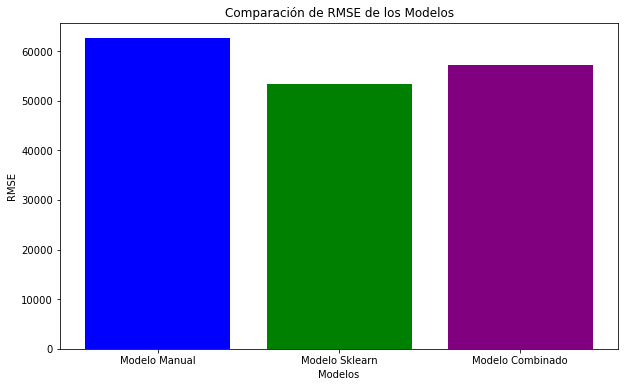

In [22]:
# Graficando el mejor modelo. 
import matplotlib.pyplot as plt

# Crear una lista con los errores
rmse_values = [rmse_manual, rmse_sklearn, rmse_combo]
models = ['Modelo Manual', 'Modelo Sklearn', 'Modelo Combinado']

# Crear gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(models, rmse_values, color=['blue', 'green', 'purple'])
plt.xlabel('Modelos')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE de los Modelos')
plt.show()

In [23]:
# El modelo con el RSME mas bajo es el Modelo Skelearn.